INFO: Removing LowRankModels (unregistered)


INFO: Cloning LowRankModels from http://github.com/madeleineudell/LowRankModels.jl
INFO: Computing changes...
INFO: No packages to install, update or remove
INFO: Package database updated


In [3]:
include("proxgrad.jl")

INFO: Precompiling module LowRankModels.


proxgrad_const (generic function with 1 method)

In [571]:
using DataFrames
using PyPlot
using ScikitLearn
using ScikitLearn.Pipelines: Pipeline, named_steps
using ScikitLearn.GridSearch: GridSearchCV
using ScikitLearn.CrossValidation: cross_val_score
using PyCall
using LowRankModels
using Clustering
#using Gadfly

@sk_import decomposition: PCA
@sk_import datasets: load_digits
@sk_import linear_model: LogisticRegression

INFO: Precompiling module Clustering.


LoadError: LoadError: @pyimport2: PCA already defined
while loading In[571], in expression starting on line 48

In [349]:
df_hotel=readtable("train_clean.csv")

,x,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool,nor_price,nor_location1,nor_location2,nor_pricediff,nor_star,nor_review,nor_bookwind
1,550,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,6618,3,4.0,0,4.13,0.1492,4.78,25,118.94,0,13901,6,3,1,1,1,0,5592.09,0,0,NA,0,-0.307063503558,0.662857864707,0.092800024,0.26283456111,-0.341986561519,0.123171926392,-0.608514490529
2,551,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,11747,4,4.5,0,4.03,0.1439,5.34,12,113.86,0,13901,6,3,1,1,1,0,5592.33,0,0,NA,0,-0.345259420951,0.599367791653,0.0607509241069,0.295460561445,0.624740189085,0.6920190256,-0.608514490529
3,552,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,18311,4,4.0,0,3.93,0.1366,5.44,14,129.1,0,13901,6,3,1,1,1,0,5592.6,0,0,NA,0,-0.230671668771,0.535877718599,0.0166078242542,0.197582560439,0.624740189085,0.123171926392,-0.608514490529
4,553,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,19599,3,4.0,0,4.16,0.1647,5.03,26,94.54,0,13901,6,3,1,1,1,0,5591.92,0,0,NA,0,-0.490524209149,0.681904886623,0.186528523687,0.419542121776,-0.341986561519,0.123171926392,-0.608514490529
5,554,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,24002,4,4.5,0,4.16,0.181,5.6,3,185.02,0,13901,6,3,1,1,1,0,5592.13,0,0,NA,0,0.189784177813,0.681904886623,0.285094623358,-0.161560340891,0.624740189085,0.6920190256,-0.608514490529
6,555,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,29732,3,3.5,0,2.83,0.047,4.69,31,59.98,0,13901,6,3,1,1,1,0,5593.31,0,0,NA,0,-0.750376749527,-0.162513084993,-0.525203373938,0.641501683113,-0.341986561519,-0.445675172816,-0.608514490529
7,556,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,35796,3,3.5,0,2.64,0.0403,5.0,27,97.59,0,13901,6,3,1,1,1,0,5590.9,0,0,NA,0,-0.46759162095,-0.283144223795,-0.565718273803,0.399953676693,-0.341986561519,-0.445675172816,-0.608514490529
8,557,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,36148,3,3.5,0,4.06,0.1241,4.84,34,74.21,0,13901,6,3,1,1,1,0,5592.39,0,0,NA,0,-0.643383067537,0.618414813569,-0.0589796754936,0.550110347528,-0.341986561519,-0.445675172816,-0.608514490529
9,558,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,41784,4,3.0,1,2.3,0.0622,5.15,22,142.32,0,13901,6,3,1,1,1,0,5591.13,0,0,NA,0,-0.131272056971,-0.499010472179,-0.433288974245,0.112677890275,0.624740189085,-1.01452227202,-0.608514490529
10,559,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,43781,4,3.5,1,3.99,0.2159,5.21,6,109.79,0,13901,6,3,1,1,1,0,5592.02,0,0,NA,0,-0.375861268154,0.573971762431,0.496134922654,0.32159989636,0.624740189085,-0.445675172816,-0.608514490529


In [575]:
size(df_hotel[df_hotel[:booking_bool].==0,:])

(371452,39)

In [642]:
df_limfeature = df_hotel[:,6:29];
df_limfeature = df_limfeature[:,[1,2,6,9,12]];
#df_limfeature

,visitor_hist_starrating,visitor_hist_adr_usd,prop_review_score,prop_location_score2,price_usd
1,4.31,180.75,4.0,0.1492,118.94
2,4.31,180.75,4.5,0.1439,113.86
3,4.31,180.75,4.0,0.1366,129.1
4,4.31,180.75,4.0,0.1647,94.54
5,4.31,180.75,4.5,0.181,185.02
6,4.31,180.75,3.5,0.047,59.98
7,4.31,180.75,3.5,0.0403,97.59
8,4.31,180.75,3.5,0.1241,74.21
9,4.31,180.75,3.0,0.0622,142.32
10,4.31,180.75,3.5,0.2159,109.79


In [666]:

#Customer Cluster:
c_feature_cols = df_limfeature[:, [1,2]]
c_features_c = convert(Array{Float64,2}, c_feature_cols)'  # use matrix() on Julia v0.2
kmeans=KMeans(k=3, max_iter=200)
c_result = ScikitLearn.fit!(kmeans,c_features_c)    # onto 3 clusters
#c_result.centers
#c_result.assignments;
#plt(result, x = "fea", y = "bookb",Geom.point)

df_hotel[:cus_clu_index]=c_result.label_;

#Hotel Cluster:
h_feature_cols = df_limfeature[:, [3,4,5]]
h_features_c = convert(Array{Float64,2}, h_feature_cols)'  # use matrix() on Julia v0.2
h_result = Clustering.kmeans(h_features_c, 3)    # onto 3 clusters
h_result.centers
h_result.assignments;
#plt(result, x = "fea", y = "bookb",Geom.point)

df_hotel[:hot_clu_index]=h_result.assignments;
c_result.cluster_centers_

LoadError: LoadError: type SkGLRM has no field label_
while loading In[666], in expression starting on line 11

In [351]:
n=size(df_hotel)[1]
for i=1:n
    if df_hotel[:nor_pricediff][i]<0
        df_hotel[:nor_pricediff][i]=-1*df_hotel[:nor_pricediff][i]
    end
end


In [644]:
#df_book=df_hotel[df_hotel[:booking_bool].==1,:]
#df_not_book=df_hotel[df_hotel[:booking_bool].==0,:]
no_book = df_hotel[df_hotel[:booking_bool].==0,:]
booked = df_hotel[df_hotel[:booking_bool].==1,:]
rand0 = zeros(350000)
rand1 = ones(21452)
r_index = [rand0; rand1] 
shuffle!(r_index)
no_book_use = no_book[r_index.==1,:]
no_book_nouse = no_book[r_index.==0,:]
data_set = [booked; no_book_use]

,x,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool,nor_price,nor_location1,nor_location2,nor_pricediff,nor_star,nor_review,nor_bookwind,cus_clu_index,hot_clu_index
1,568,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,77040,4,4.0,0,3.14,0.0839,5.39,16,153.5,0,13901,6,3,1,1,1,0,5593.11,0,1,924.0,1,-0.04721096318,0.0343061414737,-0.302069074683,0.0408749997727,0.624740189085,0.123171926392,-0.608514490529,1,1
2,586,49,2013-02-07 18:40:10,16,31,2.5,270.08,31,13962,4,4.5,1,6.42,0.7886,5.43,4,115.24,0,2799,1,5,2,0,1,0,144.11,0,1,128.48,1,-0.334883364652,2.11678053764,3.9592518111,0.860314248355,0.624740189085,0.6920190256,-0.570646922369,3,1
3,1082,80,2013-01-03 10:58:19,5,219,2.5,122.34,219,107761,4,3.5,1,2.64,0.5445,4.99,4,127.0,0,7274,2,24,1,0,1,0,386.87,0,1,324.08,1,-0.246461319662,-0.283144223795,2.48317911603,0.164065092885,0.624740189085,-0.445675172816,-0.210905024855,1,1
4,1206,87,2013-05-15 18:22:23,16,31,3.74,210.6,31,33406,4,4.0,1,0.69,0.5935,4.79,2,96.65,0,26262,1,3,1,0,1,1,166.25,0,1,96.9,1,-0.474659369444,-1.52120064835,2.77948211504,0.597700635419,0.624740189085,0.123171926392,-0.608514490529,3,1
5,1672,113,2012-11-20 11:06:17,23,181,3.89,137.25,181,97028,4,4.0,1,3.47,0.2863,4.91,12,170.25,0,3531,1,2,1,0,1,1,NA,0,1,191.79,1,0.0787302998793,0.243823382551,0.921843721234,0.346077071135,0.624740189085,0.123171926392,-0.627448274608,1,1
6,2898,184,2013-06-25 11:59:56,18,129,3.5,334.43,219,136797,2,4.0,0,1.61,0.4388,0.0,1,185.77,0,24483,1,46,2,1,1,1,NA,0,1,206.74,1,0.195423338845,-0.93709197625,1.84401121816,0.820623562907,-1.30871331212,0.123171926392,0.205638224897,3,1
7,3196,218,2013-03-14 00:42:18,32,55,5.0,185.91,129,19663,4,4.5,0,1.61,0.0056,5.12,1,143.3,0,22417,1,0,1,1,2,0,528.35,1,1,141.69,1,-0.123903553222,-0.93709197625,-0.775549173103,0.1395236937,0.624740189085,0.6920190256,-0.665315842768,1,1
8,3570,247,2013-02-11 15:37:28,5,219,2.57,122.51,219,19796,3,4.5,1,1.95,0.0807,4.83,9,98.0,1,5837,1,2,1,1,1,0,160.19,0,1,110.2,1,-0.464508879585,-0.721225727867,-0.321419474618,0.0232775114029,-0.341986561519,0.6920190256,-0.627448274608,1,1
9,3731,265,2013-01-23 18:27:52,5,219,2.3,74.79,219,24513,2,2.5,0,2.94,0.0217,4.51,13,70.0,0,9402,1,14,4,0,2,0,9.56,0,1,158.48,1,-0.675037558132,-0.0926740046339,-0.678192473428,0.103373025332,-1.30871331212,-1.58336937123,-0.400242865652,1,1
10,4303,312,2013-05-06 10:13:48,5,219,3.24,127.82,219,49989,3,3.0,1,1.61,0.0308,4.51,4,139.0,0,15893,1,2,1,0,1,0,1007.15,0,1,161.15,1,-0.156234743142,-0.93709197625,-0.623164773611,0.205939408277,-0.341986561519,-1.01452227202,-0.627448274608,1,1


In [577]:
size(data_set)

(37814,39)

In [706]:
rand00 = zeros(30000)
rand11 = ones(7814)
r_index = [rand00; rand11] 
shuffle!(r_index)

train=data_set[r_index.==0,:]
test=data_set[r_index.==1,:]

,x,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool,nor_price,nor_location1,nor_location2,nor_pricediff,nor_star,nor_review,nor_bookwind,cus_clu_index,hot_clu_index
1,568,47,2013-01-14 22:28:43,14,100,4.31,180.75,137,77040,4,4.0,0,3.14,0.0839,5.39,16,153.5,0,13901,6,3,1,1,1,0,5593.11,0,1,924.0,1,-0.04721096318,0.0343061414737,-0.302069074683,0.0408749997727,0.624740189085,0.123171926392,-0.608514490529,1,1
2,1672,113,2012-11-20 11:06:17,23,181,3.89,137.25,181,97028,4,4.0,1,3.47,0.2863,4.91,12,170.25,0,3531,1,2,1,0,1,1,NA,0,1,191.79,1,0.0787302998793,0.243823382551,0.921843721234,0.346077071135,0.624740189085,0.123171926392,-0.627448274608,1,1
3,12017,860,2012-12-07 13:31:54,5,219,3.17,134.93,219,59024,3,4.5,1,1.39,0.0083,5.11,38,95.0,1,11235,1,0,2,0,1,1,80.12,0,1,107.75,1,-0.487065523715,-1.07677013697,-0.759222273157,0.122311551791,-0.341986561519,0.6920190256,-0.665315842768,1,1
4,14854,1021,2012-11-07 16:05:55,15,55,4.33,287.22,219,15787,3,4.0,1,2.4,0.166,4.82,1,204.6,1,28315,3,4,1,0,1,0,NA,0,1,673.69,1,0.337003875168,-0.435520399125,0.194389623661,0.396485558547,-0.341986561519,0.123171926392,-0.589580706449,3,3
5,16771,1140,2013-05-05 19:47:39,32,220,3.0,174.73,100,113481,3,4.0,0,3.97,0.1552,4.99,25,138.27,0,13927,2,136,2,0,1,0,10702.36,0,1,326.61,1,-0.161723526547,0.561273747821,0.129082023879,0.100025681483,-0.341986561519,0.123171926392,1.90967879207,1,1
6,23225,1572,2012-11-07 11:40:34,5,219,3.0,119.02,134,101360,4,4.0,1,2.4,0.3411,5.62,1,152.0,0,6111,1,69,2,0,1,0,2072.85,0,1,181.18,1,-0.058489285245,-0.435520399125,1.25321932013,0.345948622314,0.624740189085,0.123171926392,0.64111525873,1,1
7,23643,1605,2013-02-13 20:45:54,15,55,3.75,151.68,219,71181,3,3.5,0,5.95,0.1932,5.52,1,158.53,1,5143,3,86,2,0,1,1,NA,0,1,593.89,1,-0.00939098985532,1.81837719429,0.358868023112,0.178130238699,-0.341986561519,-0.445675172816,0.962989588084,1,1
8,24253,1637,2013-02-06 21:29:23,14,100,3.5,518.3,219,38130,3,4.0,1,2.3,0.0993,4.67,12,80.35,1,44,1,1,2,1,1,1,129.3,0,1,92.7,1,-0.597217135884,-0.499010472179,-0.208945274993,2.67857152295,-0.341986561519,0.123171926392,-0.646382058688,2,1
9,24658,1661,2013-06-24 16:09:33,5,219,3.24,200.36,219,75434,3,4.0,1,1.79,0.0491,0.0,4,139.0,0,19045,1,47,1,0,1,1,2504.78,0,1,160.2,1,-0.156234743142,-0.822809844753,-0.512504673981,0.259944462655,-0.341986561519,0.123171926392,0.224572008977,3,1
10,28128,1891,2012-12-12 05:25:12,5,15,4.25,416.01,15,114988,4,4.5,0,2.56,0.2113,5.67,9,320.0,0,9591,2,1,1,1,1,1,NA,0,1,767.78,1,1.20468278604,-0.333936282239,0.468318722747,0.482482043683,0.624740189085,0.6920190256,-0.646382058688,2,3


In [579]:
size(test[test[:booking_bool].==1,:])[1]/size(test)[1]

0.4292295879191195

In [410]:
data_feat = data_set[:, filter(x -> (x in [:visitor_hist_starrating,:prop_starrating,:prop_review_score,:prop_brand_bool,:nor_price,:nor_pricediff,
        :nor_location2,:srch_room_count,:srch_booking_window,:srch_length_of_stay]), names(data_set))]
data_tar=data_set[:booking_bool]

37814-element DataArrays.DataArray{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [707]:
train_feat = train[:, filter(x -> (x in [:visitor_hist_starrating,:prop_starrating,:prop_review_score,:nor_price,:nor_pricediff,
        :nor_location2,:srch_room_count,:srch_booking_window,:srch_length_of_stay,:cus_clu_index,:hot_clu_index]), names(train))]
train_tar=train[:booking_bool]
test_feat = test[:, filter(x -> (x in [:visitor_hist_starrating,:prop_starrating,:prop_review_score,:nor_price,:nor_pricediff,
        :nor_location2,:srch_room_count,:srch_booking_window,:srch_length_of_stay,:cus_clu_index,:hot_clu_index]), names(test))]
test_tar=test[:booking_bool]

7814-element DataArrays.DataArray{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

(30000,11)

In [554]:
loss = L1Loss()
r = QuadReg()
glrm = GLRM(train_feat,loss,r,r,9,offset=true,scale=true)
init_svd!(glrm)
X,Y,ch = LowRankModels.fit!(glrm)

Fitting GLRM
Iteration 10: objective value = 43975.338350820166
Iteration 20: objective value = 43861.00354092462
Iteration 30: objective value = 43754.139278946415
Iteration 40: objective value = 43663.70481865591
Iteration 50: objective value = 43579.37183689288
Iteration 60: objective value = 43499.74644276204


(
[-0.0451293 5.80833e-5 … -0.12095 0.121973; -0.0400404 0.0897599 … -0.119861 -0.0104883; … ; -0.0247863 0.0575977 … -0.0647561 0.0849695; 1.0 1.0 … 1.0 1.0],

[-4.46376 -7.55656 … -1.16209 -4.46976; -0.0408128 3.63887 … 0.550565 -1.24007; … ; -4.0102 7.92215 … -0.136791 -1.19199; 3.40528 3.39506 … 0.139511 0.508082],

LowRankModels.ConvergenceHistory("ProxGradGLRM",[45584.6,44163.7,44128.6,44085.2,44061.1,44041.5,44026.3,44012.7,43999.2,43986.5  …  43514.5,43507.7,43499.7,43495.1,43486.0,43478.9,43470.4,43465.1,43457.6,43454.0],Float64[],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,3.40975,4.097,4.79114,5.45949,6.66875,7.38284,8.02245,8.64697,9.29555  …  46.0217,46.6489,47.7939,48.4543,49.091,49.7421,50.3662,51.5905,52.2401,52.872],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],0))

7814×1 DataArrays.DataArray{Int64,2}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

7814-element DataArrays.DataArray{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [708]:
Xtrain=convert(Array{Float64,2},train_feat)
Ytrain=convert(Array{Int,1},train_tar)
nY=size(Ytrain)[1]
for i =(1:nY)
    if Ytrain[i]==0
        Ytrain[i]=-1
    end
    
end
Ytrain=Ytrain[:,1]

30000-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [709]:
Xtest=convert(Array{Float64,2},test_feat)
Ytest=convert(Array,test_tar)
nYte=size(Ytest)[1]
for i =(1:nYte)
    if Ytest[i]==0
        Ytest[i]=-1
    end
end
Ytest=Ytest[:,1]

7814-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

In [703]:
head(train_feat)

,visitor_hist_starrating,prop_starrating,prop_review_score,srch_length_of_stay,srch_booking_window,srch_room_count,nor_price,nor_location2,nor_pricediff,cus_clu_index,hot_clu_index
1,4.31,4,4.0,6,3,1,-0.04721096318,-0.302069074683,0.0408749997727,1,1
2,2.5,4,4.5,1,5,1,-0.334883364652,3.9592518111,0.860314248355,3,1
3,2.5,4,3.5,2,24,1,-0.246461319662,2.48317911603,0.164065092885,1,1
4,3.74,4,4.0,1,3,1,-0.474659369444,2.77948211504,0.597700635419,3,1
5,3.89,4,4.0,1,2,1,0.0787302998793,0.921843721234,0.346077071135,1,1
6,3.5,2,4.0,1,46,1,0.195423338845,1.84401121816,0.820623562907,3,1


In [710]:
maxiter=8000
stepsize=0.01

w_1=proxgrad(LogisticLoss(),QuadReg(),Xtrain,Ytrain;maxiters=maxiter,stepsize=stepsize)

11-element Array{Float64,1}:
 -0.12362   
  0.1102    
  0.0323205 
 -0.0363253 
 -0.00135593
  0.0160764 
 -0.0697738 
  0.265586  
 -0.202452  
  0.00429808
 -0.125923  

In [149]:
function misclass(x,y,w)
    miscla=0
    n=size(x,1)
    
    for i =1:n
        yhat=w'*x[i,:]
        
        if (yhat*y[i])[1]>0
            miscla=miscla
        else
            miscla=miscla+1
        end
        
    end
    return miscla/n
end

function prec(x,y,w)
    precision_rate=0
    n=size(x,1)
    positive=0
    for i =1:n
        yhat=w'*x[i,:]
        
        if y[i]==1
            if yhat[1]>0
                precision_rate=precision_rate+1
            end
            positive=positive+1
        end
        
    end
    return precision_rate/positive
end

function recall(x,y,w)
    recall_rate=0
    n=size(x,1)
    temp=0
    for i =1:n
        yhat=w'*x[i,:]
        
        if yhat[1]>0
            if y[i]==1
                recall_rate=recall_rate+1
            end
            temp=temp+1
        end
        
    end
    return recall_rate/temp
end

recall (generic function with 1 method)

In [487]:
Y

9×9 Array{Float64,2}:
  0.964897    0.422129   0.806979  …   0.156987    0.494235    0.14535   
  2.76583     2.66488    2.06238       0.620059    0.0348732   0.352798  
 -5.59301   -10.6421    -6.32978      -4.78965    -2.59306    -2.13659   
  0.745978    1.81746    0.461484      0.68732   -14.2202      0.56913   
  0.172617    3.3408     7.20024      -4.59451    -0.373938   -4.3269    
  3.6342      6.12071   -6.13228   …  -2.79271     0.443621   -1.89716   
  2.49259     1.21565    2.67235      -0.160576    0.377252   -0.00221242
  7.14267    -2.84346    1.92704      -2.55792    -0.119745    0.606838  
  1.5837      3.00339    3.15331      -4.68164     0.169402    4.21961   

In [591]:
Xt=Xtest*inv(Y)

LoadError: LoadError: DimensionMismatch("A has dimensions (7814,10) but B has dimensions (9,9)")
while loading In[591], in expression starting on line 1

In [711]:
misclass(Xtest,Ytest,w_1)

0.39480419759406193

In [659]:
prec(Xtest,Ytest,w_1)

0.6976744186046512

In [660]:
recall(Xtest,Ytest,w_1)

0.6547285954113039

In [632]:
Xtest*w_1

7814-element Array{Float64,1}:
 -0.445609 
  1.03579  
  0.662826 
  0.0698513
 -0.0749261
 -0.339502 
 -0.464844 
 -0.39161  
 -0.010029 
  0.212573 
 -0.045166 
  0.174584 
  0.170991 
  ⋮        
 -0.222373 
 -0.273657 
 -0.842628 
 -0.331639 
 -0.120757 
 -0.907528 
 -0.0701995
 -0.240519 
 -0.324787 
  0.555914 
 -0.665928 
 -0.407766 

In [224]:
w_2=proxgrad(LogisticLoss(),QuadReg(),X',Ytrain;maxiters=maxiter,stepsize=stepsize)

6-element Array{Float64,1}:
 -1.3387   
  0.134903 
  0.969584 
  0.562991 
 -0.0750526
 -0.36118  

In [226]:
misclass(Xt',Ytest,w_2)

0.4585359610954697

8×7814 Array{Float64,2}:
  0.00894394  -0.229597    0.80565    …  -0.15981    -0.0401071  -0.146738 
  0.0938003   -0.138336    0.0177839     -0.13761     0.440517   -0.307431 
  0.168037    -0.0989003  -0.404073      -0.0472933   0.0436788   0.958659 
 -0.494594     0.559526    0.205825      -0.125987   -0.199531   -0.0550851
  0.0804154    0.163127   -0.474092       0.404997   -0.17789     0.380313 
  0.194559    -0.318288    0.0286897  …  -0.35664     0.225412   -0.322344 
  0.0865101    0.631547   -0.124887      -0.438087    0.220309   -0.0910292
  1.0          1.0         1.0            1.0         1.0         1.0      

In [535]:
using DecisionTree

In [679]:
model = build_forest(Ytrain, Xtrain, 3, 40, 1.0)

Ensemble of Decision Trees
Trees:      40
Avg Leaves: 6414.275
Avg Depth:  40.875

In [680]:
predTest = apply_forest(model, Xtest)

7814-element Array{Any,1}:
  1
 -1
 -1
 -1
  1
  1
  1
 -1
 -1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
  1
  1
  1
 -1
  1
 -1
 -1
  1
 -1

In [681]:
shouldbegood=convert(Array{Int,1},predTest)
nt=size(shouldbegood)[1]
wrong=0
for i = 1:nt
    
    if Ytest[i]!=shouldbegood[i]
        wrong=wrong+1
    end
end
wrong/nt

0.36690555413360637

In [683]:
accuracy = nfoldCV_forest(Ytrain, Xtrain, 3, 40, 5, 1.0)

2×2 Array{Int64,2}:
 2534   881
 1338  1247


Fold 1
Classes:  Any[-1,1]
Matrix:   
Accuracy: 0.6301666666666667
Kappa:    0.22934620033062741


2×2 Array{Int64,2}:
 2515   904
 1357  1224


Fold 2
Classes:  Any[-1,1]
Matrix:   
Accuracy: 0.6231666666666666
Kappa:    0.21444249158504958


2×2 Array{Int64,2}:
 2475   880
 1470  1175


Fold 3
Classes:  Any[-1,1]
Matrix:   
Accuracy: 0.6083333333333333
Kappa:    0.18633739299038313


2×2 Array{Int64,2}:
 2579   788
 1472  1161


Fold 4
Classes:  Any[-1,1]
Matrix:   
Accuracy: 0.6233333333333333
Kappa:    0.21293507538584452


2×2 Array{Int64,2}:
 2503   933
 1338  1226


Fold 5
Classes:  Any[-1,1]
Matrix:   
Accuracy: 0.6215
Kappa:    0.21084856771273733

Mean Accuracy: 0.6213000000000001


5-element Array{Float64,1}:
 0.630167
 0.623167
 0.608333
 0.623333
 0.6215  

LoadError: LoadError: MethodError: no method matching fit!(::DecisionTree.Ensemble, ::Array{Float64,2}, ::Array{Int64,1})
Closest candidates are:
  fit!(!Matched::LowRankModels.SkGLRM, ::Any, ::Any; kwargs...) at /Users/Junrui/.julia/v0.5/LowRankModels/src/scikitlearn.jl:83
  fit!(!Matched::ScikitLearn.Skcore.FitBit, ::Any...; kwargs...) at /Users/Junrui/.julia/v0.5/ScikitLearn/src/sk_utils.jl:240
  fit!(!Matched::PyCall.PyObject, ::Any...; kwargs...) at /Users/Junrui/.julia/v0.5/ScikitLearn/src/Skcore.jl:95
  ...
while loading In[551], in expression starting on line 2

In [155]:

pca=PCA()

ScikitLearn.fit!(pca,Xtrain)

LowRankModels.SkGLRM(nothing,LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain()),LowRankModels.ZeroReg(),LowRankModels.ZeroReg(),nothing,nothing,1.0e-5,0.0001,100,1,-1,LowRankModels.init_svd!,false,LowRankModels.GLRM([4.31 4.0 … -0.302069 0.040875; 2.5 4.0 … 3.95925 0.860314; … ; 2.42 3.0 … -0.784015 0.556669; 2.42 3.0 … -0.475013 0.0791527],LowRankModels.Loss[LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain()),LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain()),LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain()),LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain()),LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain()),LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain()),LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain()),LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain())],LowRankModels.ZeroReg(),LowRankModels.Regularizer[LowRankModels.ZeroReg(),LowRankModels.ZeroReg(),LowRankModels.ZeroReg(),LowRankModels.ZeroReg(),LowRankModels.ZeroReg(),LowRankModels.ZeroReg()

In [156]:
plot(pca[:explained_variance_], linewidth=2)

LoadError: LoadError: MethodError: no method matching getindex(::LowRankModels.SkGLRM, ::Symbol)
while loading In[156], in expression starting on line 1

In [109]:
n_components = [1, 2, 3, 4, 5,6,7]
Cs = logspace(-3, 3, 5)
dict = Dict{Symbol,Any}(:pca__n_components=>n_components)
                              #:logistic__C=>Cs)

Dict{Symbol,Any} with 1 entry:
  :pca__n_components => [1,2,3,4,5,6,7]

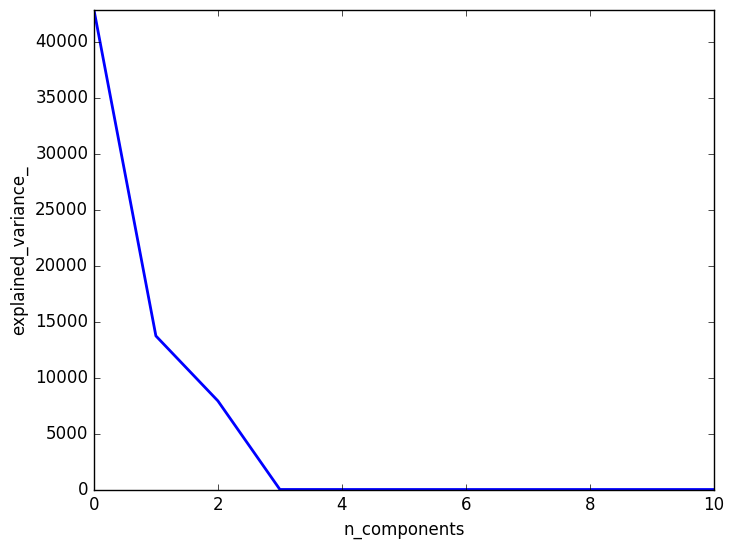

3-element Array{Float64,1}:
     0.0001
     1.0   
 10000.0   

In [115]:
plot(pca[:explained_variance_], linewidth=2)
axis("tight")
xlabel("n_components")
ylabel("explained_variance_")

n_components = [1, 2, 3, 4, 5,6,7]
Cs = logspace(-4, 4, 3)

#Parameters of pipelines can be set using ‘__’ separated parameter names:
#estimator = GridSearchCV(LogisticRegression(), dict)
#ScikitLearn.fit!(estimator,X,Y )

#axvline(named_steps(estimator.best_estimator_)["pca"][:n_components],
#            linestyle=":", label="n_components chosen")
#legend(prop=Dict("size"=>12))

PyObject PCA(copy=True, n_components=None, whiten=False)